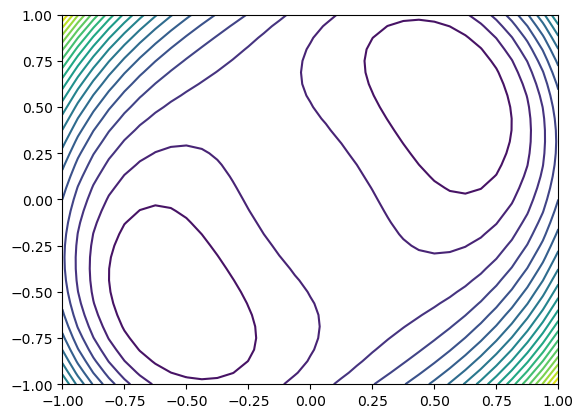

In [1]:
import numpy as np

# Two-minima function and its gradient
def L(theta, alpha=2):
    return (theta[0] - theta[1])**2 + (alpha*theta[0]**2 + theta[1]**2 - 1)**2

def gL(theta, alpha=2):
    return np.array([2*(theta[0]-theta[1]) + 2*(alpha*theta[0]**2 + theta[1]**2 - 1)*2*alpha*theta[0],
                    -2*(theta[0]-theta[1]) + 2*(alpha*theta[0]**2 + theta[1]**2 - 1)*2*theta[1]])

# Plot this function
from matplotlib import pyplot as plt
T1, T2 = np.meshgrid(np.linspace(-1,1,33), np.linspace(-1,1,33))
plt.contour(T1, T2, L([T1, T2], alpha=2), 20)
plt.show()

In [2]:
from scipy.optimize import fminbound

def gd(L, gL, theta0, eps=1e-6, max_iters=100):
    theta = theta0
    Thetas = []
    for k in range(max_iters):
        gLk = gL(theta)
        if (np.linalg.norm(gLk) < eps):
            print(f"converged in {k} iterations")
            break
        tk = fminbound(lambda t: L(theta - t * gLk), 0, 100)
        theta = theta - tk * gLk
        Thetas.append(theta)
    return theta, np.array(Thetas)

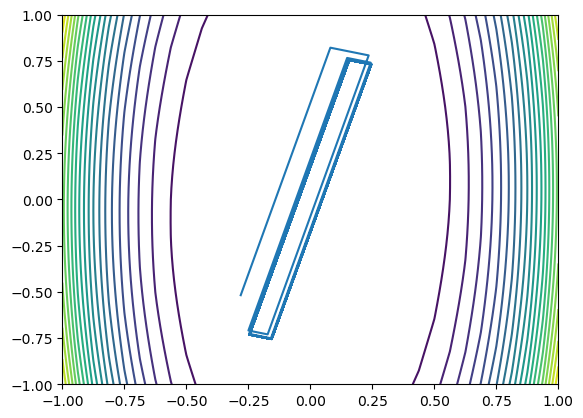

In [3]:
alpha = 10
# theta0 = np.array([-0.5, 0.6])
theta0 = np.array([0.4, -0.7])
theta_star, Thetas = gd(lambda theta: L(theta, alpha), lambda theta: gL(theta, alpha), theta0)

# Plot this function
from matplotlib import pyplot as plt
T1, T2 = np.meshgrid(np.linspace(-1,1,33), np.linspace(-1,1,33))
plt.contour(T1, T2, L([T1, T2], alpha), 20)
plt.plot(Thetas[:,0], Thetas[:,1])
plt.show()